In [1]:
import numpy as np
from scipy import signal

%matplotlib inline
import matplotlib.pyplot as plt

## 1D convolution

In [81]:
b = np.random.random(4)
a = np.random.random(10)
np.convolve(a, b)

array([ 0.03328637,  0.20954538,  0.46624235,  1.00328735,  1.48056442,
        1.3490874 ,  1.01474671,  1.11501881,  1.53772213,  1.52540741,
        0.98279507,  0.38698673,  0.06486863])

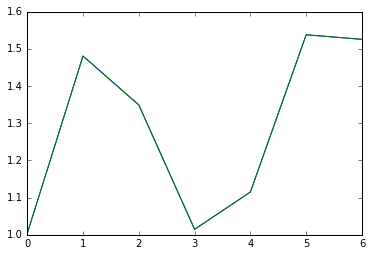

In [82]:
def convolve(a, b):
    
    if a.shape[0] < b.shape[0]: 
        a, b = b, a
    
    return np.array([
            # important to remember the [::-1]
            np.matmul(a[i:i+b.shape[0]], b[::-1]) # \equiv dot().sum()
            for i in range(a.shape[0] - b.shape[0] + 1)
        ])

plt.plot(convolve(a, b))
plt.plot(signal.convolve(a, b, mode="valid"))
plt.show()
# print(convolve(a, b), signal.convolve(a, b, mode="valid"))

## 2D convolution

In [150]:
a = np.random.random((3, 6))
b = np.random.random((2, 2))

[[  0.00000000e+00   1.11022302e-16   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   2.22044605e-16
    2.22044605e-16]]


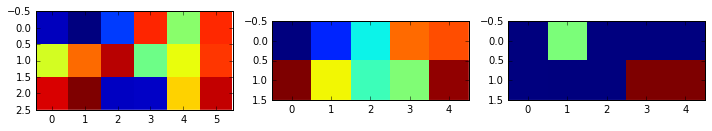

In [151]:
# 2D convolution
def convolve2d(a, b):
    #a_f = a.flatten().reshape((a.size, 1))
    #b_f = b.flatten().reshape((1, b.size))
    
    return np.array(
        [
            [
                (a[i:i+b.shape[0], j:j+b.shape[1]]* b[::-1,::-1]).sum()
                for j in range(a.shape[1] - b.shape[1] + 1)
            ]
            for i in range(a.shape[0] - b.shape[0] + 1)
        ])

print(convolve2d(a,b) - signal.convolve2d(a,b,mode='valid'))
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.imshow(a, interpolation="none")
plt.subplot(132)
plt.imshow(convolve2d(a, b), interpolation="none")
plt.subplot(133)
plt.imshow(convolve2d(a, b)-signal.convolve2d(a, b, mode='valid'), interpolation="none")
plt.show()

results in the difference are from floating point imprecision. 

## 3D convolution (for video applications)

In [155]:
a = np.random.random((3, 6, 4))
b = np.random.random((2, 2, 3))

In [154]:
# 2D convolution
def convolve3d(a, b):
    #a_f = a.flatten().reshape((a.size, 1))
    #b_f = b.flatten().reshape((1, b.size))
    
    return np.array(
        [
            [
                [
                    (a[i:i+b.shape[0], j:j+b.shape[1], k:k+b.shape[2]]* b[::-1, ::-1, ::-1]).sum()
                    for k in range(a.shape[2] - b.shape[2] + 1)
                ]
                for j in range(a.shape[1] - b.shape[1] + 1)
            ]
            for i in range(a.shape[0] - b.shape[0] + 1)
        ])